In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

## **Exercise: Model Complexity in Linear Model**

**Gunakan dataset 'Admission_Predict'**

        - Features: 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA'
        - Target: 'Chance of Admit'

- Lakukan data splitting dengan proporsi 80:20 dan random_state = 42.

- Gunakan model Ridge Regression dan Lasso Regression dengan berbagai nilai alpha (100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001).
  
- Berapa nilai alpha terbaik untuk tiap model?
  
- Bandingkan performa kedua model ditinjau dari nilai RMSE-nya, manakah yang lebih baik?

In [28]:
df = pd.read_csv('Admission_Predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [30]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [31]:
df.duplicated().sum()

0

In [32]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [33]:
df.columns = df.columns.str.strip()

# EDA

In [34]:
Y =df['Chance of Admit']
Y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [35]:
X = df.drop(columns=['Serial No.', 'Research', 'Chance of Admit'])
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21


In [36]:
X = MinMaxScaler().fit(X).transform(X)
X

array([[0.94      , 0.92857143, 0.75      , 0.875     , 0.875     ,
        0.91346154],
       [0.68      , 0.53571429, 0.75      , 0.75      , 0.875     ,
        0.66346154],
       [0.52      , 0.42857143, 0.5       , 0.5       , 0.625     ,
        0.38461538],
       ...,
       [0.8       , 0.85714286, 0.75      , 1.        , 0.875     ,
        0.84935897],
       [0.44      , 0.39285714, 0.5       , 0.625     , 0.75      ,
        0.63461538],
       [0.86      , 0.89285714, 0.75      , 1.        , 0.75      ,
        0.91666667]])

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
display(X_train, X_test, Y_train, Y_test)

array([[0.64      , 0.64285714, 0.5       , 0.625     , 0.375     ,
        0.59935897],
       [0.56      , 0.64285714, 0.5       , 0.75      , 0.5       ,
        0.64102564],
       [1.        , 1.        , 1.        , 0.875     , 0.875     ,
        0.99679487],
       ...,
       [0.32      , 0.46428571, 0.25      , 0.375     , 0.5       ,
        0.45512821],
       [0.24      , 0.25      , 0.        , 0.25      , 0.25      ,
        0.14423077],
       [0.48      , 0.5       , 0.25      , 0.75      , 0.625     ,
        0.46474359]])

array([[0.22      , 0.42857143, 0.5       , 0.625     , 0.75      ,
        0.42307692],
       [0.42      , 0.35714286, 0.5       , 0.875     , 0.75      ,
        0.58974359],
       [1.        , 0.78571429, 1.        , 0.75      , 0.75      ,
        0.8974359 ],
       [0.7       , 0.57142857, 0.75      , 0.875     , 0.75      ,
        0.72435897],
       [0.22      , 0.17857143, 0.25      , 0.5       , 0.5       ,
        0.34615385],
       [1.        , 0.82142857, 1.        , 0.875     , 0.875     ,
        0.84935897],
       [0.14      , 0.14285714, 0.25      , 0.375     , 0.125     ,
        0.34935897],
       [0.26      , 0.25      , 0.5       , 0.25      , 0.375     ,
        0.27564103],
       [0.44      , 0.46428571, 0.25      , 0.25      , 0.375     ,
        0.52884615],
       [0.66      , 0.75      , 0.5       , 0.75      , 0.5       ,
        0.80769231],
       [0.66      , 0.57142857, 0.5       , 0.625     , 0.5       ,
        0.57692308],
       [0.88      , 0

3      0.80
18     0.63
202    0.97
250    0.74
274    0.58
       ... 
71     0.96
106    0.87
270    0.72
348    0.57
102    0.62
Name: Chance of Admit, Length: 320, dtype: float64

209    0.68
280    0.68
33     0.90
210    0.79
93     0.44
       ... 
246    0.72
227    0.64
369    0.67
176    0.90
289    0.79
Name: Chance of Admit, Length: 80, dtype: float64

# Lasso

        Alpha  RMSE_Train  RMSE_Test
0  100000.000    0.137470   0.160764
1   10000.000    0.137470   0.160764
2    1000.000    0.137470   0.160764
3     100.000    0.137470   0.160764
4      10.000    0.137470   0.160764
5       1.000    0.137470   0.160764
6       0.100    0.137470   0.160764
7       0.010    0.083653   0.103012
8       0.001    0.063096   0.071085


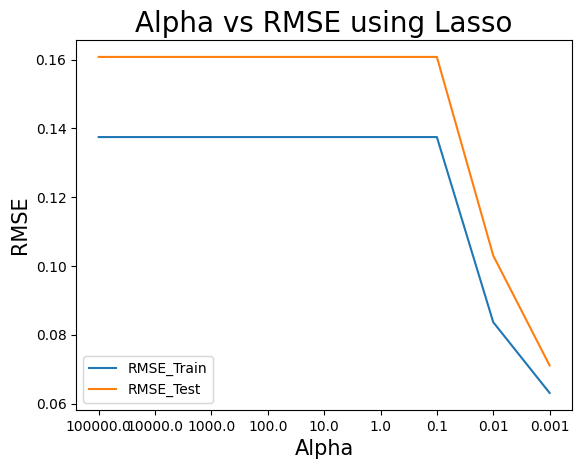

In [38]:
l_alpha = np.logspace(5,-3,9)
df_rmse = pd.DataFrame(columns=['Alpha', 'RMSE_Train','RMSE_Test'])
for i in l_alpha:
    model = Lasso(alpha=i)
    model.fit(X_train,Y_train)
    Y_train_predict = model.predict(X_train)
    Y_test_predict = model.predict(X_test) 
    df_rmse.loc[len(df_rmse)] = {'Alpha': i, 'RMSE_Train': mean_squared_error(Y_train, Y_train_predict)**(0.5), 'RMSE_Test': mean_squared_error(Y_test, Y_test_predict)**(0.5)}

print(df_rmse)
sns.lineplot(data=df_rmse, x=range(len(df_rmse)), y='RMSE_Train', label='RMSE_Train')
sns.lineplot(data=df_rmse, x=range(len(df_rmse)), y='RMSE_Test', label='RMSE_Test')
plt.xticks(ticks=range(len(df_rmse)),labels=df_rmse['Alpha'], fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Alpha', fontsize=15)
plt.ylabel('RMSE', fontsize=15)
plt.title('Alpha vs RMSE using Lasso', fontsize=20)
plt.show()

# Ridge

        Alpha  RMSE_Train  RMSE_Test
0  100000.000    0.137391   0.160681
1   10000.000    0.136683   0.159939
2    1000.000    0.130179   0.153108
3     100.000    0.096458   0.116685
4      10.000    0.067969   0.080017
5       1.000    0.063293   0.070886
6       0.100    0.062851   0.069279
7       0.010    0.062843   0.069117
8       0.001    0.062842   0.069101


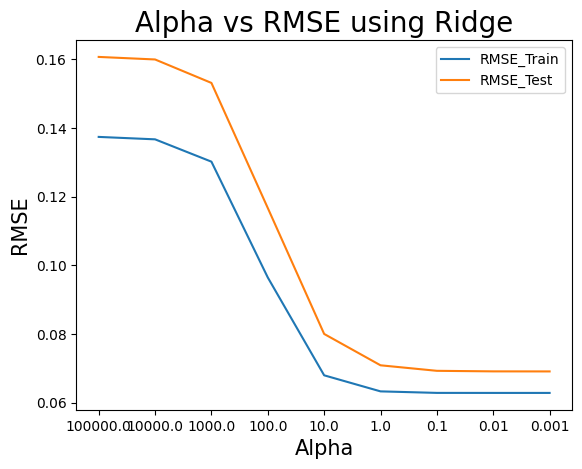

In [39]:
l_alpha = np.logspace(5,-3,9)
df_rmse = pd.DataFrame(columns=['Alpha', 'RMSE_Train','RMSE_Test'])
for i in l_alpha:
    model = Ridge(alpha=i)
    model.fit(X_train,Y_train)
    Y_train_predict = model.predict(X_train)
    Y_test_predict = model.predict(X_test) 
    df_rmse.loc[len(df_rmse)] = {'Alpha': i, 'RMSE_Train': mean_squared_error(Y_train, Y_train_predict)**(0.5), 'RMSE_Test': mean_squared_error(Y_test, Y_test_predict)**(0.5)}

print(df_rmse)
sns.lineplot(data=df_rmse, x=range(len(df_rmse)), y='RMSE_Train', label='RMSE_Train')
sns.lineplot(data=df_rmse, x=range(len(df_rmse)), y='RMSE_Test', label='RMSE_Test')
plt.xticks(ticks=range(len(df_rmse)),labels=df_rmse['Alpha'], fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Alpha', fontsize=15)
plt.ylabel('RMSE', fontsize=15)
plt.title('Alpha vs RMSE using Ridge', fontsize=20)
plt.show()